In [ ]:
import pandas as pd

In [ ]:
x=pd.read_csv("/content/Regulatory Affairs of Road Accident Data 2020 India.csv")


In [ ]:
df=pd.DataFrame(x)
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [ ]:
df.isnull().sum()

,0
Million Plus Cities,0
Cause category,0
Cause Subcategory,0
Outcome of Incident,0
Count,3


In [ ]:
df.dropna()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0
...,...,...,...,...,...
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Count
count,9547.000000
mean,103.627632
std,275.189303
min,0.000000
25%,0.000000
50%,12.000000
75%,70.500000
max,3148.000000


from matplotlib import pyplot as plt
_df_0['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [ ]:
display(df['Million Plus Cities'].unique())


array(['Agra', 'Ahmedabad', 'Allahabad(Prayagraj)', 'Amritsar',
       'Asansol Durgapur', 'Aurangabad', 'Bengaluru', 'Bhopal',
       'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Dhanbad',
       'Faridabad', 'Ghaziabad', 'Gwalior', 'Hyderabad', 'Indore',
       'Jabalpur', 'Jaipur', 'Jamshedpur', 'Jodhpur', 'Kannur', 'Kanpur',
       'Khozikode', 'Kochi', 'Kolkata', 'Kollam', 'Kota', 'Lucknow',
       'Ludhiana', 'Madurai', 'Mallapuram', 'Meerut', 'Mumbai', 'Nagpur',
       'Nashik', 'Patna', 'Pune', 'Raipur', 'Rajkot', 'Srinagar', 'Surat',
       'Thiruvanthapuram', 'Thrissur', 'Tiruchirapalli', 'Vadodra',
       'Varanasi', 'Vijaywada city', 'Vizaq'], dtype=object)

In [ ]:
cause_data1 = df.groupby('Cause category')['Count'].sum().sort_values(ascending=False)
display(cause_data)


,Count
Cause category,
Junction,173308.0
Road Features,173308.0
Traffic Violation,173308.0
Traffic Control,173308.0
Weather,173308.0
Impacting Vehicle/Object,122793.0


In [ ]:
cause_data2 = df.groupby('Cause Subcategory')['Count'].sum().sort_values(ascending=False)
display(cause_data)


,Count
Cause category,
Junction,173308.0
Road Features,173308.0
Traffic Violation,173308.0
Traffic Control,173308.0
Weather,173308.0
Impacting Vehicle/Object,122793.0


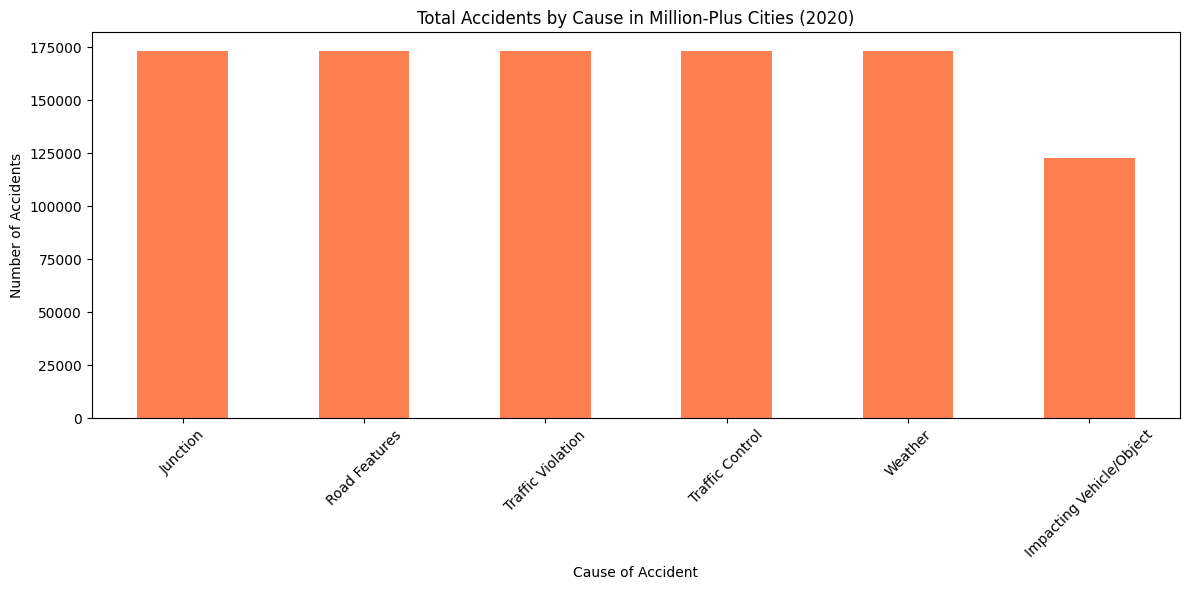

In [ ]:
import matplotlib.pyplot as plt

cause_data1.plot(kind='bar', figsize=(12,6), color='coral')
plt.title('Total Accidents by Cause in Million-Plus Cities (2020)')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


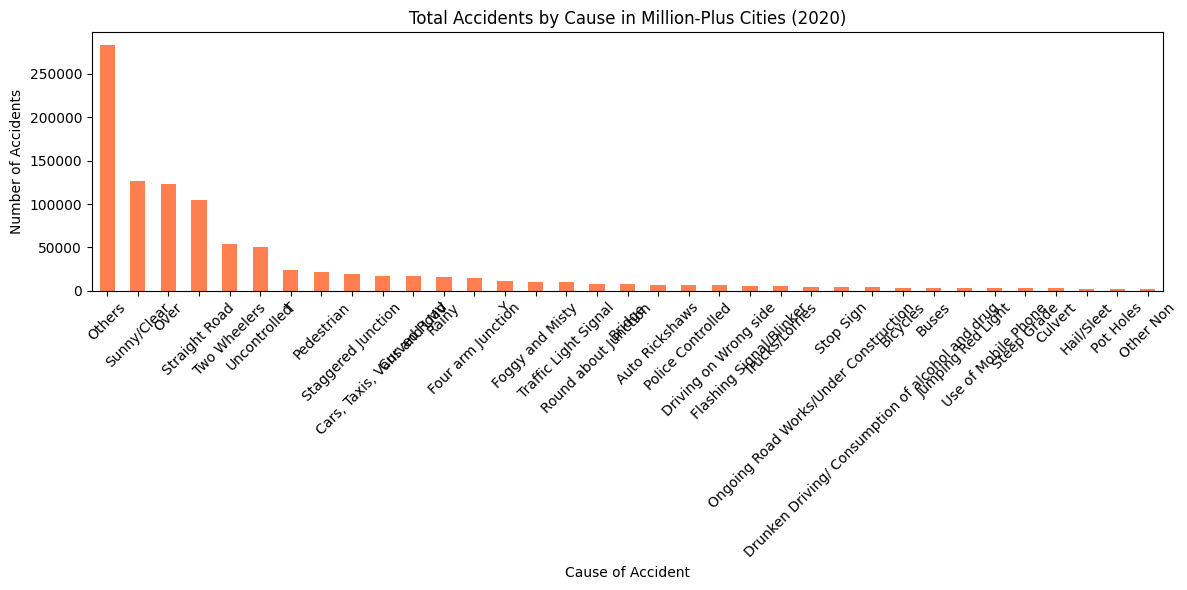

In [ ]:
import matplotlib.pyplot as plt

cause_data2.plot(kind='bar', figsize=(12,6), color='coral')
plt.title('Total Accidents by Cause in Million-Plus Cities (2020)')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

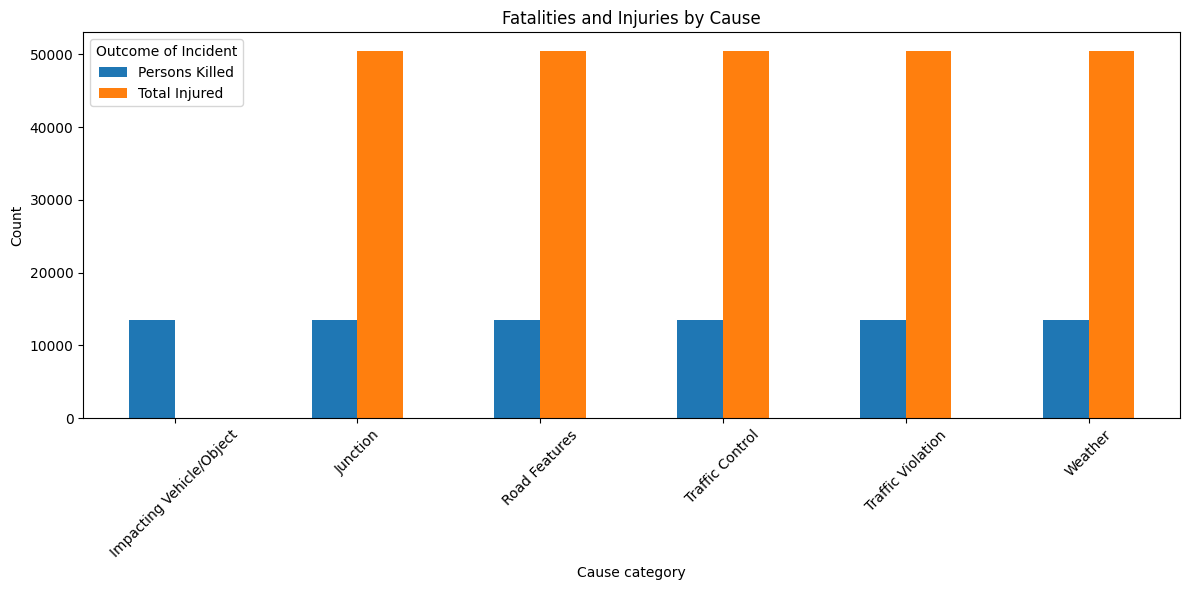

In [ ]:
# Accidents by cause and fatality
# Filter for relevant outcomes and group by cause and outcome
fatalities_injuries = df[df['Outcome of Incident'].isin(['Persons Killed', 'Total Injured'])].groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().unstack()

fatalities_injuries.sort_values(by='Persons Killed', ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Fatalities and Injuries by Cause')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

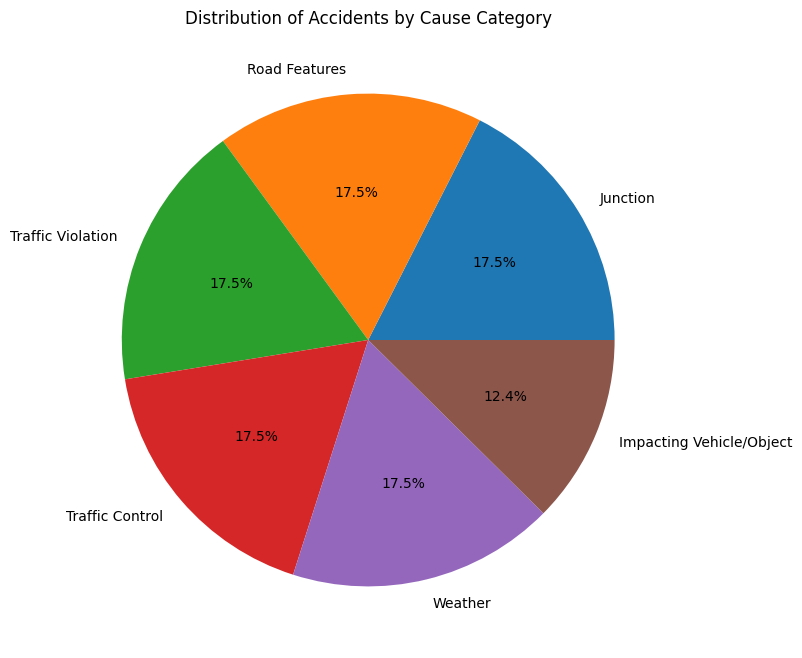

In [ ]:
# Pie chart for Cause category
cause_data1.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Accidents by Cause Category')
plt.ylabel('') # Remove the default 'Count' label on the y-axis
plt.show()

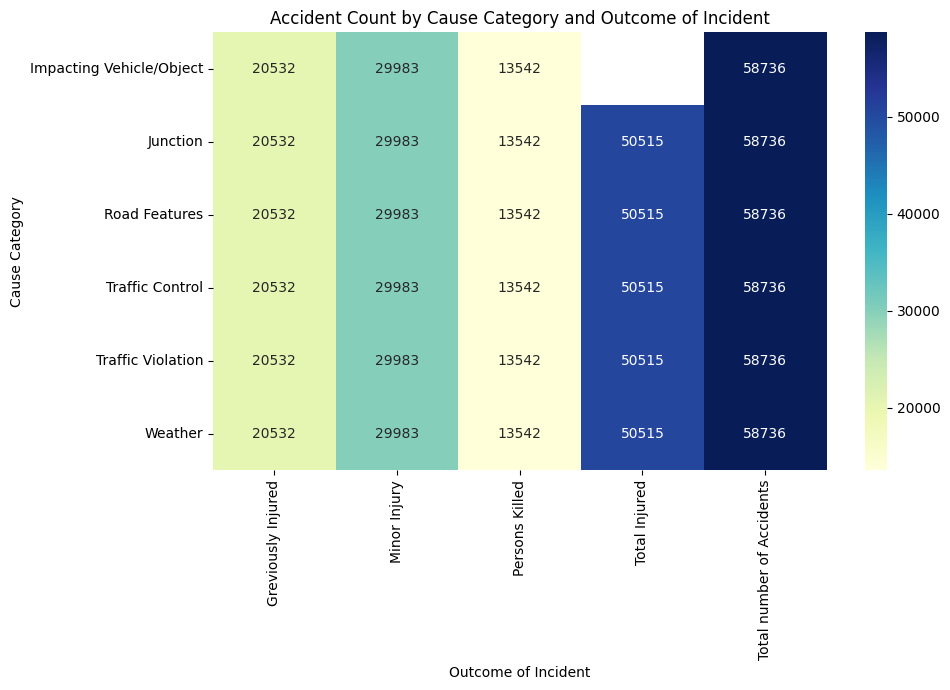

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for heatmap
heatmap_data = df.groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().unstack()

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Accident Count by Cause Category and Outcome of Incident')
plt.xlabel('Outcome of Incident')
plt.ylabel('Cause Category')
plt.tight_layout()
plt.show()